Training a perceptron on a basic set of points to find out if a student can get a job or not. In the demo set if the y value is 1 then it means that the student got the job and if it is 0 then they didnt. Here we are calculating our prediction of if they got a job or not and then trying to change the equation of the output of the peceptron to find a clear classification.

In [1]:
#creating a demo training set by using scikitlearn library and numpy and creating a demo set of 100 rows and 2 columns.
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
#importing matlab to plot the chart to vizualize the  demo set.
import matplotlib.pyplot as plt

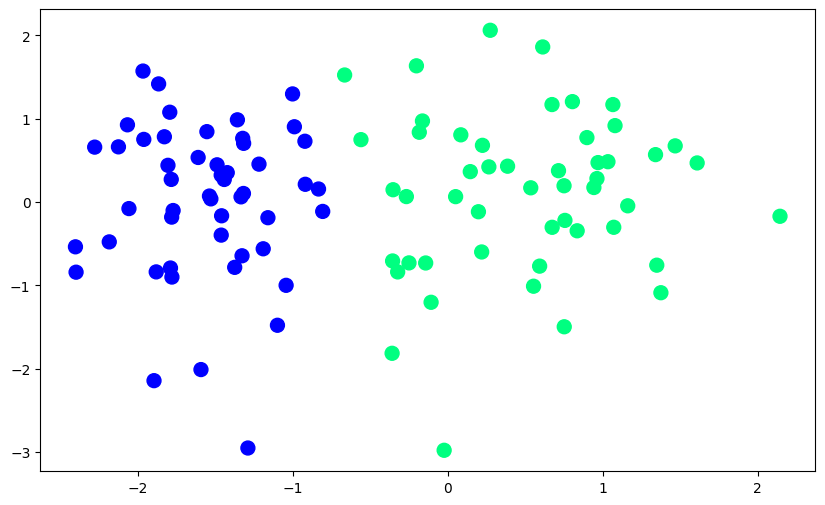

In [3]:
#ploting the chart to show how it works, all the points whose "Y" value is "0" is coloured as blue and all the points whose "Y" value is green.
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
#defining the percetron trick logic.
#here the fucntion takes two inputs X, y both of which are created previously as demo.
def perceptron(X,y):

  #Here we are inserting an extra column in the array on the 0th position, syntax ; np.insert(array name,position, axis =1). Now the shape of my X has become 3 from 2.
    X = np.insert(X,0,1,axis=1)
    #creating an array where the shape  is equal to number columns in X array which is 3 now. np.ones means that all the values in the aray is 1.
    #in the array the 0th position number is W0 or the bias, 1st and 2nd postioned number is W1 and W2.
    weights = np.ones(X.shape[1])
    #the learning rate of this model is 0.1 which means that each time it will get multiplied with the new coordiante.
    lr = 0.1

    #here we are running a loop where the epoch is 1000 and the logics are inside.
    for i in range(1000):
      #here j is a random intiger that bieng chosen, this will act as index for the X array to select a random data from the set created and analyse.
      #since the range of X is 100 rows, we will select any number between 0 to 100
        j = np.random.randint(0,100)
        #here we will calculate y_hat value, now as per our logic if the value of y_hat is more than 1 then they will get a job and if it is less than 1 then they wont.
        #Now,"np.dot(X[j],weights)" menas that the X array at the jth value will get dot product with the weights array,i.e. X[random value] dot product [1,1,1]
        #The Function "Step" will be defined latter which basically the activation function or step activation function. if o/p > 0 then final out is 1, o/p < 0 then final out is 0
        y_hat = step(np.dot(X[j],weights))
        #Here we are usong the of changing the values of the weights based upon the logic "W_new = W_old + Learning Rate (Y_i - Y_hat) * X_i" and changing the equation value.
        #Here at "y[j] - y_hat" we are comparing the values of the demo set Y at the jth position and the Y_hat value after the step function and comparing and seeing if we need to-
        #change the equation of the line
        weights = weights + lr*(y[j]-y_hat)*X[j]

    #Here we are returning the weights array in two different segmants. the 0th value is the bias or the intercept value and the 1st and 2nd values are the W1 and W2 values.
    return weights[0],weights[1:]


In [5]:
#Activation function, Step function
def step(z):
    return 1 if z>0 else 0

In [7]:
#Calling the function and getting the bias and weights or intercept and coeficient values.
bias,coef_ = perceptron(X,y)

In [8]:
#printing out the bias and the weights.
print(coef_)
print(bias)

[1.385332   0.05901572]
1.0


In [9]:
#For a line de[[icted as "Ax + By + C =0" transforming it as "y = mx +c" by calcualting " m = - (A/B)" and c = -(C/B)
#Here A/W1 = "coef_" at 0th position, B/W2 = is "coef_" at 1st position and intercept = bias/W2
slope = -(coef_[0]/coef_[1])
intercept = -(bias/coef_[1])

In [10]:
#Ploting the line to see if it works or not.
x_input = np.linspace(-3,3,100)
y_input = slope*x_input + intercept

(-3.0, 2.0)

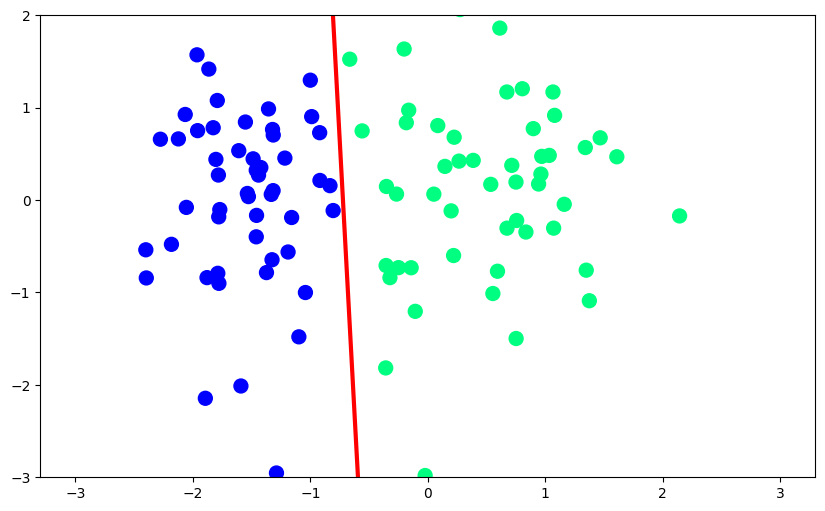

In [11]:
#Ploting the entire the dateset and the final value of the perceptron
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)